# Classification Method
Start: 3/9/2020

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('persona_test.csv')
df.head()

,nama,umur,gaji,kategori
0,rebecca,15,3.0,fashion
1,khadija,15,5.0,fashion
2,fion,17,10.0,fashion
3,chantelle,18,3.5,sport
4,kane,20,7.0,fashion


Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (30, 4)
Classifying variables in data set...
    4 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Nothing to add Plot not being added
Could not draw Distribution Plot
Nothing to add Plot not being added
Time to run AutoViz (in seconds) = 0.459


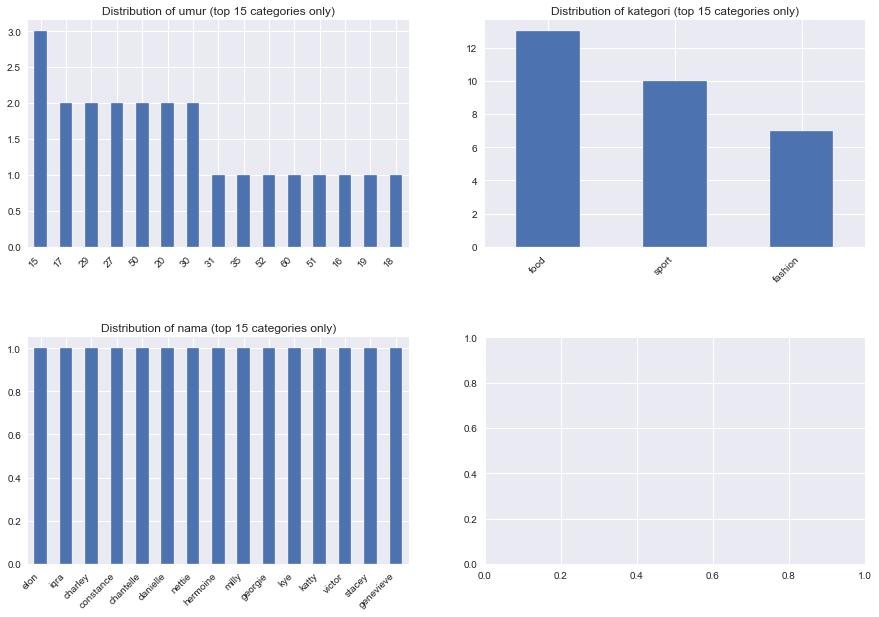

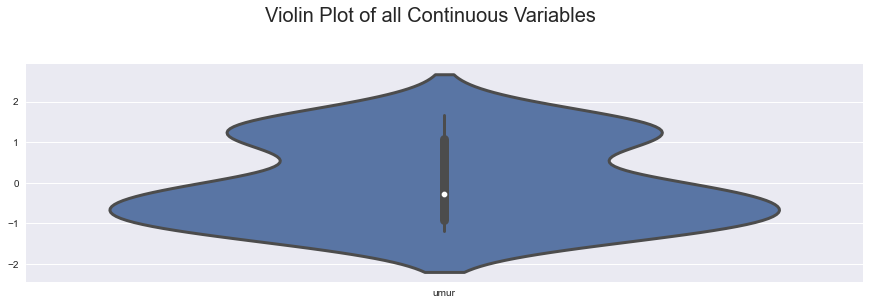

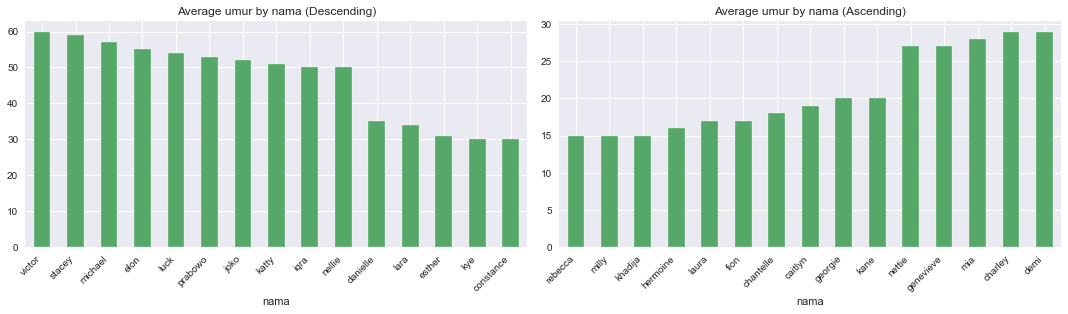

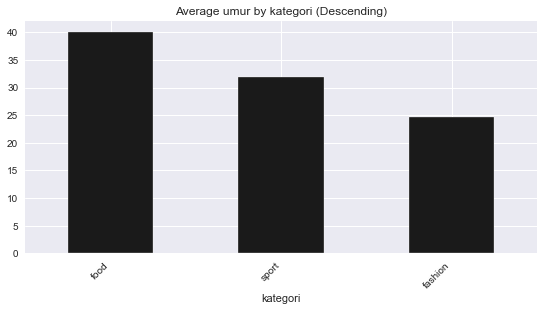

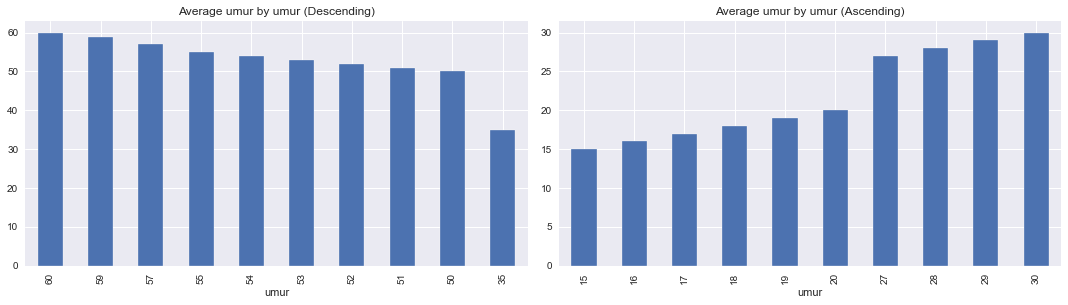

In [3]:
#autoviz
from autoviz.AutoViz_Class import AutoViz_Class #import Autoviz class
AV = AutoViz_Class() #instantiate the AutoViz class

viz = AV.AutoViz('persona_test.csv') #, depVar='Sales'

In [4]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['kategori_encoded'] = labelencoder.fit_transform(df['kategori'])

In [5]:
print("Before feature scaling")
df.head(30)

Before feature scaling


,nama,umur,gaji,kategori,kategori_encoded
0,rebecca,15,3.0,fashion,0
1,khadija,15,5.0,fashion,0
2,fion,17,10.0,fashion,0
3,chantelle,18,3.5,sport,2
4,kane,20,7.0,fashion,0
5,laura,17,10.0,food,1
6,milly,15,20.0,fashion,0
7,caitlyn,19,5.0,food,1
8,georgie,20,8.0,sport,2
9,hermoine,16,21.0,food,1


In [6]:
#split train test 80:20. Drop labels for test
from sklearn.model_selection import train_test_split

X = df[['umur', 'gaji']]
y = df[['kategori_encoded']]

#minmax scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
#After feature scaling
X

array([[0.        , 0.        ],
       [0.        , 0.02061856],
       [0.04444444, 0.07216495],
       [0.06666667, 0.00515464],
       [0.11111111, 0.04123711],
       [0.04444444, 0.07216495],
       [0.        , 0.17525773],
       [0.08888889, 0.02061856],
       [0.11111111, 0.05154639],
       [0.02222222, 0.18556701],
       [0.44444444, 0.48453608],
       [0.26666667, 0.43298969],
       [0.28888889, 0.08247423],
       [0.26666667, 0.1185567 ],
       [0.33333333, 0.1443299 ],
       [0.31111111, 1.        ],
       [0.33333333, 0.31958763],
       [0.42222222, 0.22680412],
       [0.31111111, 0.17525773],
       [0.35555556, 0.19587629],
       [0.77777778, 0.01030928],
       [1.        , 0.04123711],
       [0.86666667, 0.07216495],
       [0.88888889, 0.27835052],
       [0.97777778, 0.89690722],
       [0.93333333, 0.1443299 ],
       [0.77777778, 0.16494845],
       [0.8       , 0.27835052],
       [0.82222222, 0.43298969],
       [0.84444444, 0.3814433 ]])

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.6666666666666666

In [9]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr.score(X_test,y_test)

0.6666666666666666